In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 43s 0us/step


In [3]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [4]:
model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the result and feed it into a dense layer
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))

# Output layer with 10 classes (CIFAR-10 has 10 classes)
model.add(layers.Dense(10, activation='softmax'))

C:\Users\HW798MH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - accuracy: 0.3303 - loss: 1.7999 - val_accuracy: 0.5318 - val_loss: 1.3051
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.5577 - loss: 1.2324 - val_accuracy: 0.5895 - val_loss: 1.1503
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6272 - loss: 1.0567 - val_accuracy: 0.6343 - val_loss: 1.0249
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.6826 - loss: 0.9160 - val_accuracy: 0.6695 - val_loss: 0.9655
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.7156 - loss: 0.8149 - val_accuracy: 0.6767 - val_loss: 0.9397
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.7410 - loss: 0.7367 - val_accuracy: 0.7036 - val_loss: 0.8713
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.7683 - loss: 0.6690 - val_accuracy: 0.6993 - val_loss: 0.9072
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.7852 - loss: 0.6223 - 

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7240 - loss: 0.8551
Test accuracy: 0.720300018787384


In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7240 - loss: 0.8551
Test accuracy: 0.720300018787384


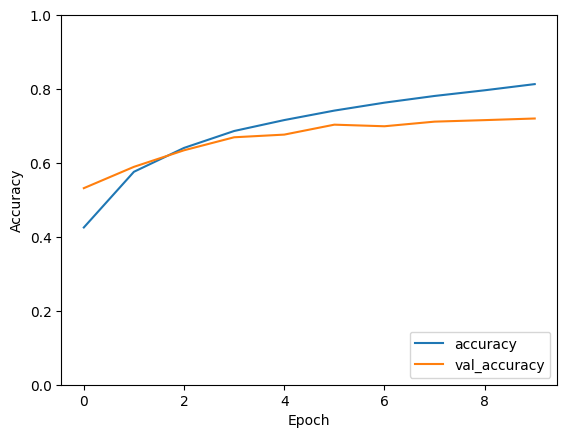

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [10]:
# Make predictions on the test set
predictions = model.predict(x_test)

# predictions are in the form of probabilities for each class; 
# to get the actual predicted classes, use argmax
predicted_classes = predictions.argmax(axis=1)

# The true classes (for comparison)
true_classes = y_test.argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


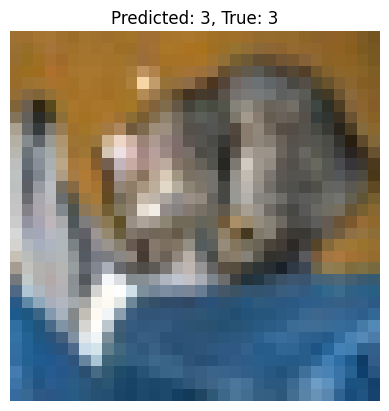

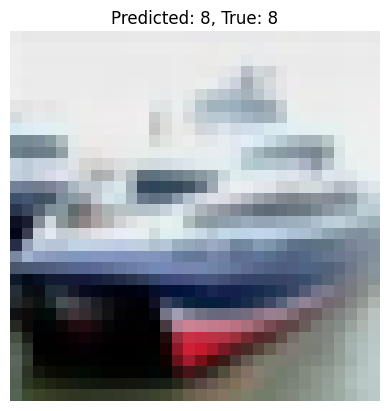

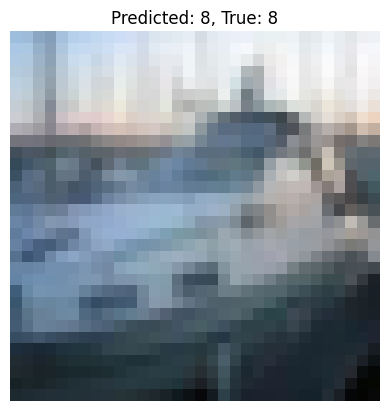

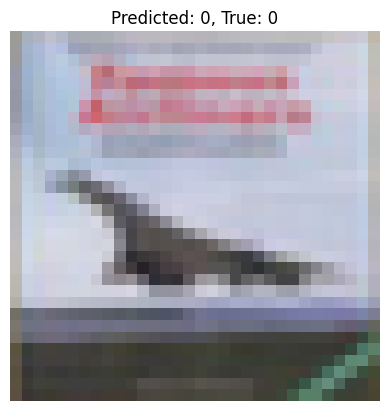

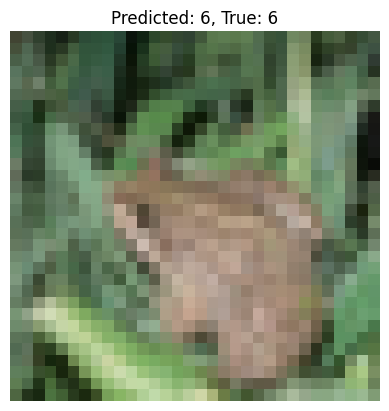

In [13]:
# Display the first 5 predictions
for i in range(5):
    plt.imshow(x_test[i])  # No need to reshape, as x_test[i] is already in the correct shape
    plt.title(f"Predicted: {predicted_classes[i]}, True: {true_classes[i]}")
    plt.axis('off')
    plt.show()
